In [319]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm')
df = pd.read_csv("ner.csv", index_col=0)
# en_core_web_sm : a pipeline on written web text that includes vocabulary, syntax and entities
#named entity recognition : after ner, entities are obtained from the dataset (basically keywords like SQL, Python, etc). based on that, jobs are assigned.

In [320]:
classes = ['Software_Developer', 'Database_Administrator',
           'Systems_Administrator', 'Project_manager',
           'Web_Developer', 'Network_Administrator',
           'Security_Analyst', 'Python_Developer',
           'Java_Developer', 'Front_End_Developer']



In [321]:
data = pd.concat([df["Ents"], df[classes]],axis = 1)
data.head()

,Ents,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer
0,"[SQL, SSIS, OLTP, Backing, Generating, Log Shi...",0,1,0,0,0,0,0,0,0,0
1,"[Microsoft, XP Microsoft, Assembly Language Mi...",0,1,0,0,0,0,0,0,0,0
2,"[Carrier Objective, Experienced Creating Users...",0,1,0,0,0,0,0,0,0,0
3,"[Amazon Redshift Administrator, yearsPostgresS...",0,1,0,0,0,0,0,0,0,0
4,"[Scrum Master, Scrum Master, October April R...",0,1,0,0,0,0,0,0,0,0


In [322]:
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = data.columns[1:]
most_common_cat['count'] = data.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

,cat,count
0,Software_Developer,15013
1,Web_Developer,6594
2,Systems_Administrator,5969
3,Project_manager,4550
4,Network_Administrator,4460


In [323]:
[i for i in range(len(df)) if len(df["Ents"][i])==20205]

[18785]

In [324]:
df["Ents"][18785]

'[Microsoft, multibillion dollar, New York, Microsoft, Multicloud, MultiCloud, Data Pipeline Data, Uber Gen, Hudi, Scala SBT, Oozie, Big Data Data Engineer Data Scientist Data Warehousing Spark HDFS Kafka BI Kubernetes, IBM, IBM, Cloud Private ICP, CNN, GAIA Ericsson, Artificial Intelligence ML DL, G Working, Kubernetes, The Kubernetes Cluster I, Data Pipeline Data Lake Raw Data Landing Zone Processing Zone Consumption Zone, Kibana ELK, NiFi, Jupyter Zeppelin Scala Python, Machine Learning Deep Learning Convolutional Neural Networks, CNN, Azure Big Data, Data Warehousing Spark Databricks, HDInsight BI, Machine Learning Deep Learning, Artificial Intelligence Neural NetworkSenior, Big Data Data Engineer Data Scientist Data Warehousing Spark HDFS BI, IBM, IBM, Cloud Private ICP, CNNSenior, Big Data Business Intelligence BI Data Warehousing Machine Learning Deep Learning System Engineering  yearsBig Data Hadoop Spark, Hortonworks, KafKa Hive, Tableau Power BI, QlikView Scala, Java Maven, C

In [325]:
set([i.ent_type_ for i in nlp(df["Text"][18785]) if i.ent_type_ != ''])

{'CARDINAL',
 'DATE',
 'FAC',
 'GPE',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'TIME',
 'WORK_OF_ART'}

In [37]:
remove_ents = ["DATE", "CARDINAL", "GPE", "ORDINAL", "PERCENT", "TIME"]
#entities that are not useful are removed here

In [38]:
import re
from spacy import displacy
def remove_unwanted_tags(x):
    x_spc= nlp(x)  #spacy model
    x_return= ''
    idx= 0
    idx_last_ent= 0
    len_last_ent= 0
    
    for i, ent in enumerate(x_spc.ents):
        idx= x.find(ent.text)
        if i == 0:
            x_return= x[0: idx]
        else:
            x_return= x_return + x[idx_last_ent+ len_last_ent: idx]
            
        if ent.label_ not in remove_ents:
            x_return= x_return+ ent.text
            
        if i== len(x_spc.ents)-1:
                x_return= x_return+ x[idx+len(ent.text): ]
        
        len_last_ent= len(ent.text)
        idx_last_ent= idx
    
    x_return= x_return.lower()
    
    x_return= re.sub('[^\sa-z]', '', x_return)

    x_return= ' '.join([x for x in x_return.split(' ') if (len(x)> 1)])
    
    #displacy.render(x_spc, style= 'ent', jupyter= True)
    
    return x_return

In [282]:
df["new"] = df.Ents.apply(lambda x: remove_unwanted_tags(x))


In [284]:
df.to_csv("finale.csv")

In [41]:
max([len(i) for i in l])

1126386

In [48]:
df.columns

Index(['Text', 'Label', 'Software_Developer', 'Database_Administrator',
       'Systems_Administrator', 'Project_manager', 'Web_Developer',
       'Network_Administrator', 'Security_Analyst', 'Python_Developer',
       'Java_Developer', 'Front_End_Developer', 'TextLen', 'Ents', 'new'],
      dtype='object')

In [49]:
df

#new column contains entities that remained after the useless ones were removed like CARDINAL etc etc 

,Text,Label,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer,TextLen,Ents,new
0,Database AdministratorDatabase AdministratorDa...,[b'Database_Administrator'],0,1,0,0,0,0,0,0,0,0,6511,"[SQL, SSIS, OLTP, Backing, Generating, Log Shi...",sql ssis oltp backing generating log shipping ...
1,Database AdministratorSQL Microsoft PowerPoint...,[b'Database_Administrator'],0,1,0,0,0,0,0,0,0,0,2027,"[Microsoft, XP Microsoft, Assembly Language Mi...",microsoft xp microsoft assembly language micro...
2,Oracle Database AdministratorOracle Database A...,[b'Database_Administrator'],0,1,0,0,0,0,0,0,0,0,3115,"[Carrier Objective, Experienced Creating Users...",carrier objective experienced creating users r...
3,Amazon Redshift Administrator ETL Developer Bu...,[b'Database_Administrator'],0,1,0,0,0,0,0,0,0,0,3328,"[Amazon Redshift Administrator, yearsPostgresS...",amazon redshift administrator redshift adminis...
4,Scrum MasterOracle Database Administrator Scru...,[b'Database_Administrator'],0,1,0,0,0,0,0,0,0,0,4105,"[Scrum Master, Scrum Master, October April R...",scrum masterscrum master scrum master scrum ma...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29778,ServiceNow DeveloperServiceNow DeveloperServic...,"[b'Java_Developer\n', b'Web_Developer\n', b'So...",1,0,0,0,1,0,0,0,1,0,18467,[ServiceNow DeveloperServiceNow DeveloperServi...,servicenow developerservicenow developerservic...
29779,Android DeveloperAndroid DeveloperRoute Planne...,"[b'Web_Developer\n', b'Software_Developer']",1,0,0,0,1,0,0,0,0,0,7961,"[DeveloperAndroid, DeveloperJoomla CMS, Samsun...",developerandroid developerjoomla cms samsung w...
29780,UI DeveloperUI WEB DeveloperUI DeveloperUI Dev...,"[b'Software_Developer\n', b'Front_End_Develope...",1,0,0,0,1,0,0,0,0,1,14170,"[UI, WEB, DeveloperVisual, Web Applications De...",ui web developervisual web applications develo...
29781,Web DeveloperJavascriptPHPFront EndWordpressWe...,"[b'Web_Developer\n', b'Software_Developer']",1,0,0,0,1,0,0,0,0,0,693,"[September July , PHP]",php


In [305]:
df.drop(columns=['Text', 'Label','TextLen'],inplace=True)


KeyError: "['Text', 'Label', 'TextLen'] not found in axis"

In [306]:
df.to_csv('fin.csv')

In [20]:
df["Ents"]

0        [SQL, SSIS, OLTP, Backing, Generating, Log Shi...
1        [Microsoft, XP Microsoft, Assembly Language Mi...
2        [Carrier Objective, Experienced Creating Users...
3        [Amazon Redshift Administrator, yearsPostgresS...
4        [Scrum Master, Scrum Master, October  April  R...
                               ...                        
29778    [ServiceNow DeveloperServiceNow DeveloperServi...
29779    [DeveloperAndroid, DeveloperJoomla CMS, Samsun...
29780    [UI, WEB, DeveloperVisual, Web Applications De...
29781                             [September  July  , PHP]
29782    [Sr Software, Web DeveloperWeb DeveloperWeb De...
Name: Ents, Length: 29783, dtype: object

In [241]:
def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

In [255]:
df['new']

0        sql ssis oltp backing generating log shipping ...
1        microsoft xp microsoft assembly language micro...
2        carrier objective experienced creating users r...
3        amazon redshift administrator redshift adminis...
4        scrum masterscrum master scrum master scrum ma...
                               ...                        
29778    servicenow developerservicenow developerservic...
29779    developerandroid developerjoomla cms samsung w...
29780    ui web developervisual web applications develo...
29781                                                  php
29782    sr software web developerweb developerweb deve...
Name: new, Length: 29783, dtype: object

In [285]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(df['new'])
sequences = tokenizer.texts_to_sequences(df['new'])
x = pad_sequences(sequences, maxlen=256)

In [286]:
type(df['new'])

pandas.core.series.Series

In [287]:
import keras
keras.__version__

'2.8.0'

In [288]:
df.shape

(29783, 15)

In [329]:
df = pd.read_csv("fin.csv", index_col=0)

In [330]:
 df[df.columns[:10]]

,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29778,1,0,0,0,1,0,0,0,1,0
29779,1,0,0,0,1,0,0,0,0,0
29780,1,0,0,0,1,0,0,0,0,1
29781,1,0,0,0,1,0,0,0,0,0


In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, df[df.columns[:10]], test_size=0.2, random_state=42, shuffle=True)

In [459]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D,Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [460]:
model = Sequential()
model.add(Embedding(1000, 20, input_length=256))
model.add(GlobalMaxPool1D())
model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='sigmoid'))

In [461]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['Precision','Recall','AUC'])

In [462]:
X_train

array([[  0,   0,   0, ..., 112, 112, 112],
       [906,  32,  10, ..., 653, 423,  46],
       [  0,   0,   0, ...,  16, 269, 178],
       ...,
       [  0,   0,   0, ..., 173,  30, 114],
       [  0,   0,   0, ..., 381,  52,  85],
       [450,  45,  14, ..., 439, 104, 629]])

In [463]:
y_train

,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer
1383,0,1,0,0,0,0,0,0,0,0
26541,0,0,1,0,0,0,0,0,0,0
2441,0,1,0,0,0,0,0,0,0,0
21879,1,0,0,0,0,0,0,0,0,0
25193,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21575,1,0,0,0,0,0,0,0,0,0
5390,1,0,0,0,0,0,0,0,0,1
860,0,1,0,0,0,0,0,0,0,0
15795,0,0,0,0,0,1,0,0,0,0


In [464]:
model.fit(X_train,y_train, epochs=30)

Epoch 1/30
745/745 [==============================] - 10s 10ms/step - loss: 0.3675 - precision: 0.6727 - recall: 0.2740 - auc: 0.7938
Epoch 2/30
745/745 [==============================] - 9s 12ms/step - loss: 0.2777 - precision: 0.7688 - recall: 0.4356 - auc: 0.9004
Epoch 3/30
745/745 [==============================] - 7s 10ms/step - loss: 0.2446 - precision: 0.7794 - recall: 0.5727 - auc: 0.9267
Epoch 4/30
745/745 [==============================] - 7s 9ms/step - loss: 0.2251 - precision: 0.7927 - recall: 0.6479 - auc: 0.9386
Epoch 5/30
745/745 [==============================] - 8s 11ms/step - loss: 0.2131 - precision: 0.7981 - recall: 0.6852 - auc: 0.9450
Epoch 6/30
745/745 [==============================] - 6s 8ms/step - loss: 0.2063 - precision: 0.8004 - recall: 0.7054 - auc: 0.9484
Epoch 7/30
745/745 [==============================] - 8s 11ms/step - loss: 0.2009 - precision: 0.8030 - recall: 0.7150 - auc: 0.9511
Epoch 8/30
745/745 [==============================] - 9s 12ms/step - l

In [465]:
model.evaluate(X_test, y_test)

187/187 [==============================] - 2s 5ms/step - loss: 0.1873 - precision: 0.8209 - recall: 0.7455 - auc: 0.9565


[0.18726219236850739, 0.820946991443634, 0.7455149292945862, 0.956528902053833]

In [466]:
y_pred=model.predict(X_test)

In [394]:
model.save('dnn-final.h5')

In [364]:
y_pred.shape

(5957, 10)

In [365]:
y_test.shape

(5957, 10)

In [468]:
normalized = []
for i in y_pred:
    l = []
    for j in i:
        if j>=0.5:
            l.append(1)
        else:
            l.append(0)
    normalized.append(l)

In [469]:
normalized

[[1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0,

In [470]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
accuracy_score(y_test, normalized)


0.4762464327681719

In [471]:
multilabel_confusion_matrix(y_test, normalized).shape

(10, 2, 2)

In [472]:
cf_matrix=multilabel_confusion_matrix(y_test, normalized)

In [473]:
cf_matrix[0]

array([[2821,  163],
       [ 180, 2793]], dtype=int64)

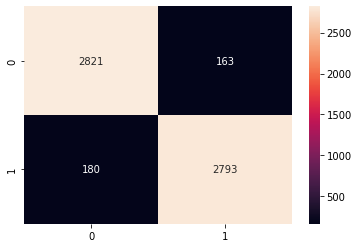

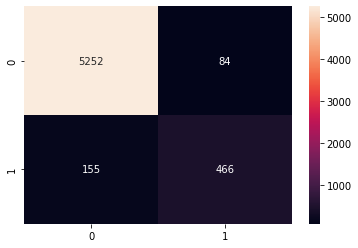

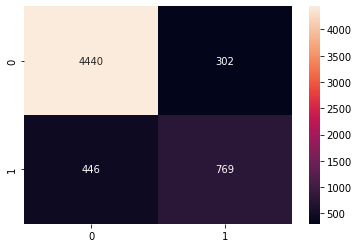

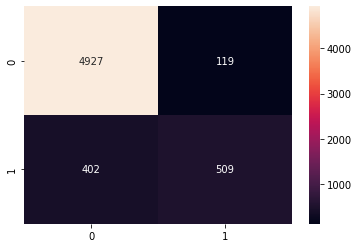

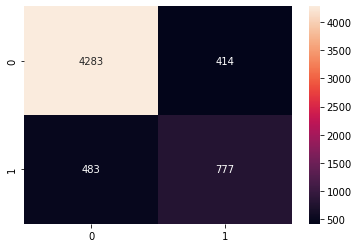

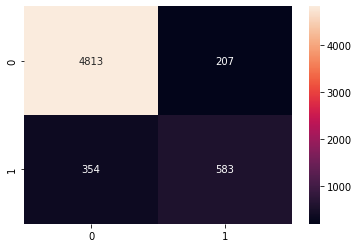

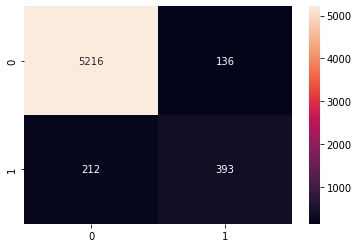

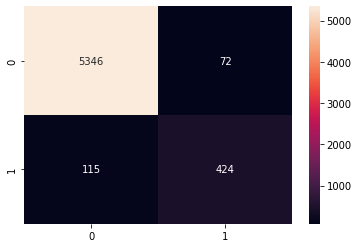

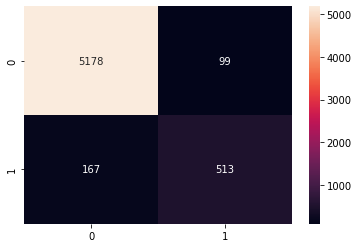

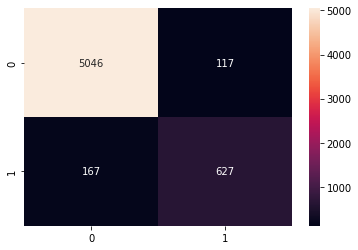

In [474]:
import seaborn as sns
for i in range(0,10):
    sns.heatmap(cf_matrix[i],fmt='',annot=True)
    plt.show()

In [475]:
from sklearn.metrics import precision_recall_fscore_support

In [476]:
precision_recall_fscore_support(y_test, normalized, average='macro')

(0.7989755462111258, 0.7100684344718046, 0.750340286537837, None)